# Import Libraries and Reading of xlsx file...


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
sns.set_style('darkgrid')
warnings.filterwarnings('ignore')

df_train = pd.read_excel("..input/Data_Train.xlsx")
print(df_train)

                                  Name    Location  Year  Kilometers_Driven  \
0               Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1     Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                         Honda Jazz V     Chennai  2011              46000   
3                    Maruti Ertiga VDI     Chennai  2012              87000   
4      Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   
...                                ...         ...   ...                ...   
6014                  Maruti Swift VDI       Delhi  2014              27365   
6015          Hyundai Xcent 1.1 CRDi S      Jaipur  2015             100000   
6016             Mahindra Xylo D4 BSIV      Jaipur  2012              55000   
6017                Maruti Wagon R VXI     Kolkata  2013              46000   
6018             Chevrolet Beat Diesel   Hyderabad  2011              47000   

     Fuel_Type Transmission Owner_Type     Mileage 

# EDA

#DATA TYPES AND THEIR NAMES OF EACH COLUMNS

In [2]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 564.4+ KB


#ROWS X COLUMNS OF Train data

In [3]:
print(df_train.shape)

(6019, 12)


# To count number of non-unique data...

In [4]:
print(df_train.nunique())

Name                 1876
Location               11
Year                   22
Kilometers_Driven    3093
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               442
Engine                146
Power                 372
Seats                   9
Price                1373
dtype: int64


# To remove the units from Mileage, Engine, Power values...Siddhisa Banerjee Code

In [5]:
df_train['Mileage'] = df_train['Mileage'].apply(lambda x : str(x).split(' ')[0]).astype(float)
df_train['Engine'] = df_train['Engine'].apply(lambda x : str(x).split(" ")[0]).astype(float)
df_train['Power'] = df_train['Power'].replace('null bhp','0 bhp').apply(lambda x : str(x).split(' ')[0]).astype(float)

# Fill NaN values of Seats column with '5', {Mileage,Engine, Power} columns with their median...Siddhisa Banerjee Code

In [6]:
df_train['Seats'] = df_train['Seats'].fillna(5)
df_train['Mileage']=df_train['Mileage'].fillna(df_train['Mileage'].median())
df_train['Engine']=df_train['Engine'].fillna(df_train['Engine'].median())
df_train['Power']=df_train['Power'].fillna(df_train['Power'].median())
print(df_train.isnull().sum())

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64


# Adding new columns for better EDA...Nikhita Kalburgikar Code

In [7]:
df_train['Brand'] = df_train['Name'].apply(lambda x : ' '.join(x.split()[: 1]))
df_train['Brand'] = df_train['Brand'].apply(lambda x : ' '.join(x.lower() for x in x.split()))

df_train['Model'] = df_train['Name'].apply(lambda x : ' '.join(x.split()[1 : 2]))
df_train['Model'] = df_train['Model'].apply(lambda x : ' '.join(x.lower() for x in x.split()))

df_train['Variant'] = df_train['Name'].apply(lambda x : ' '.join(x.split()[2 :]))
df_train['Variant'] = df_train['Variant'].apply(lambda x : ' '.join(x.lower() for x in x.split()))

df_train['Model'] = df_train['Model'].apply(lambda x:' '.join(x.lower() for x in x.split()))

# Descriptive statistics of numerical variables

In [8]:
print(df_train.describe())

              Year  Kilometers_Driven      Mileage       Engine        Power  \
count  6019.000000       6.019000e+03  6019.000000  6019.000000  6019.000000   
mean   2013.358199       5.873838e+04    18.134966  1620.509221   111.116817   
std       3.269742       9.126884e+04     4.581528   599.635458    55.313243   
min    1998.000000       1.710000e+02     0.000000    72.000000     0.000000   
25%    2011.000000       3.400000e+04    15.170000  1198.000000    74.000000   
50%    2014.000000       5.300000e+04    18.150000  1493.000000    92.700000   
75%    2016.000000       7.300000e+04    21.100000  1969.000000   138.030000   
max    2019.000000       6.500000e+06    33.540000  5998.000000   560.000000   

             Seats        Price  
count  6019.000000  6019.000000  
mean      5.276790     9.479468  
std       0.806346    11.187917  
min       0.000000     0.440000  
25%       5.000000     3.500000  
50%       5.000000     5.640000  
75%       5.000000     9.950000  
max    

# NEW UPDATED DATASET

In [9]:
print(df_train)

                                  Name    Location  Year  Kilometers_Driven  \
0               Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1     Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                         Honda Jazz V     Chennai  2011              46000   
3                    Maruti Ertiga VDI     Chennai  2012              87000   
4      Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   
...                                ...         ...   ...                ...   
6014                  Maruti Swift VDI       Delhi  2014              27365   
6015          Hyundai Xcent 1.1 CRDi S      Jaipur  2015             100000   
6016             Mahindra Xylo D4 BSIV      Jaipur  2012              55000   
6017                Maruti Wagon R VXI     Kolkata  2013              46000   
6018             Chevrolet Beat Diesel   Hyderabad  2011              47000   

     Fuel_Type Transmission Owner_Type  Mileage  En

# Distribution of Year...Padmini Krishnadas Code

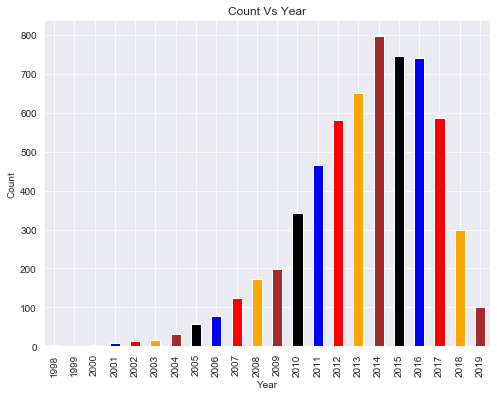

In [10]:
plt.figure(figsize = (8, 6))
df_train['Year'].value_counts().sort_index().plot(x = 'Year', kind = 'bar', color = ['Orange', 'Brown', 'Black', 'Blue', 'Red'])
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Count Vs Year')
plt.savefig('Count Vs Year')
plt.show()

#Analyzing Seats...Siddhisa Banerjee Code

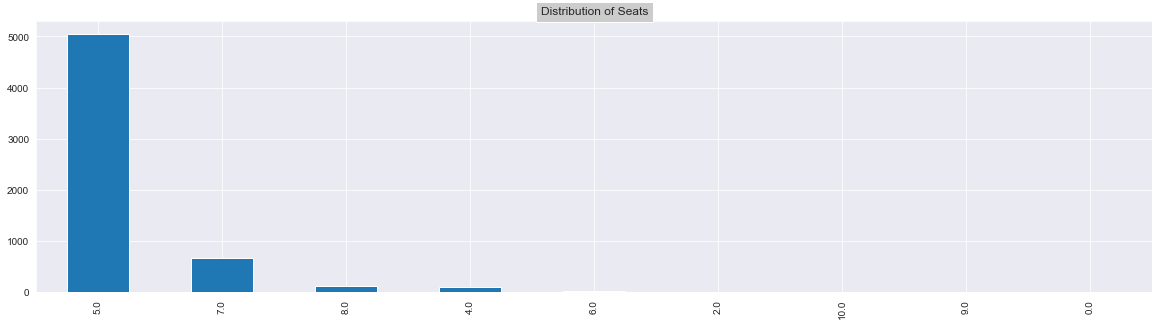

In [11]:
plt.figure(figsize=(20,5))
df_train['Seats'].value_counts().head(100).plot.bar()
plt.title('Distribution of Seats',bbox={'facecolor':'0.8', 'pad':5})
plt.show()

# Seats v/s Price...Padmini Krishnadas Code

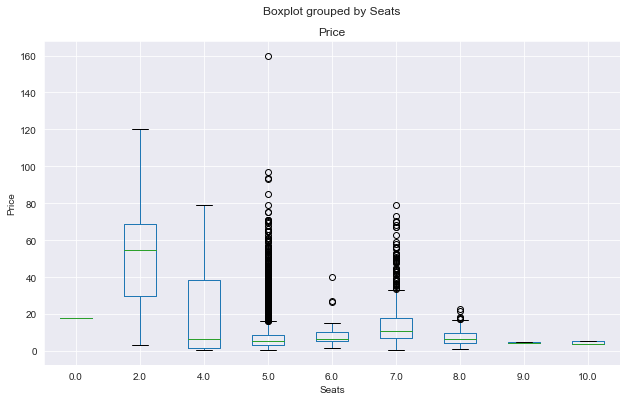

In [12]:
df_train.boxplot(column="Price", by="Seats", fontsize= 10, figsize=(10,6), return_type='both')
plt.ylabel("Price")
plt.show()

#Analyzing Seats vs Price...Siddhisa Banerjee Code

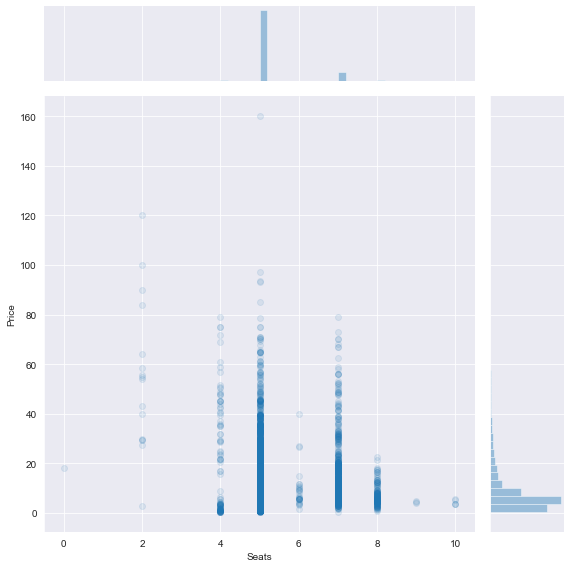

In [13]:
sns.jointplot(x='Seats', y='Price',data=df_train,alpha=0.1,size=8)
plt.show()

#Distribution Of Location...Nikhita Kalburgikar Code

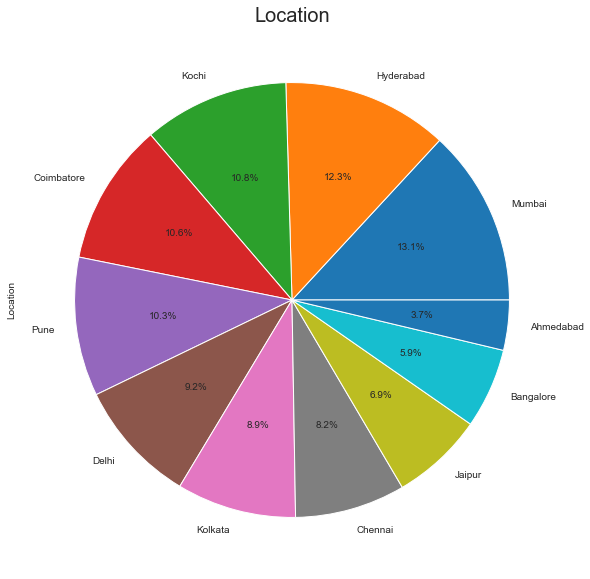

In [14]:
plt.figure(figsize=(20,10))
plt.title('Location',fontsize=20)
df_train['Location'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

# Location v/s Price...Padmini Krishnadas Code

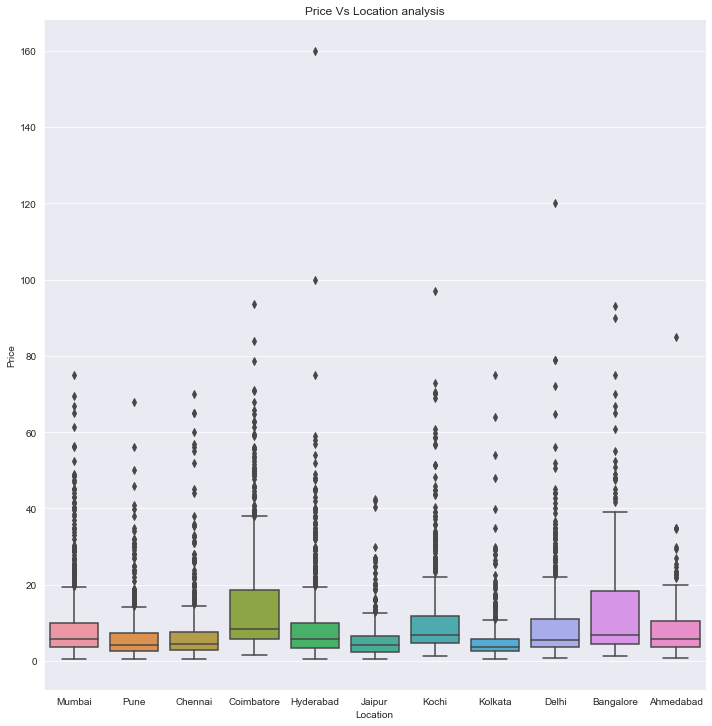

In [15]:
per_year1= sns.factorplot(y= "Price", x= "Location", data= df_train,kind="box", size = 10, aspect= 1)
per_year1.set(ylabel="Price")
per_year1.set(xlabel="Location")
per_year1.set(title="Price Vs Location analysis")
plt.show()

# Year v/s Price...

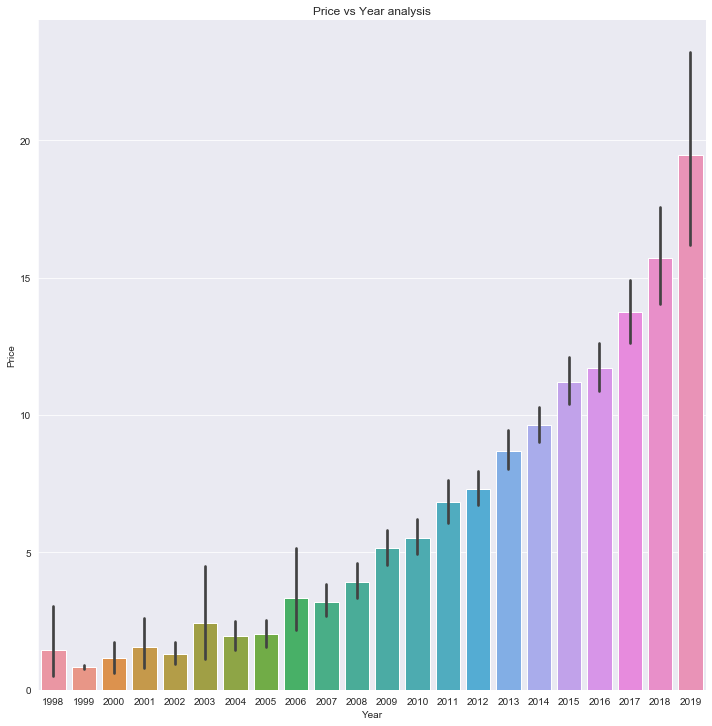

In [16]:
per_year= sns.factorplot(y= "Price", x= "Year", data= df_train, kind ="bar", size = 10, aspect= 1)# PADMINI KRISHNADAS Code
per_year.set(ylabel="Price")
per_year.set(xlabel="Year")
per_year.set(title="Price vs Year analysis")
plt.show()

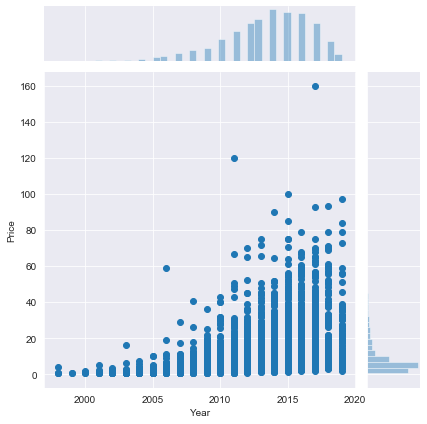

In [17]:
sns.jointplot(x="Year", y="Price", data=df_train) # Nikhita Kalburgikar Code
plt.show()

# Kilometers Driven v/s Price...Padmini Krishnadas Code

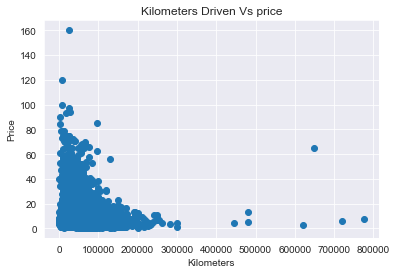

In [18]:
df_train.Kilometers_Driven[df_train.Kilometers_Driven==6500000]=650000
plt.scatter(df_train.Kilometers_Driven, df_train.Price)
plt.xlabel("Kilometers")
plt.ylabel("Price")
plt.title("Kilometers Driven Vs price")
plt.show()

# Distribution of Fuel_Type...Nikhita Kalburgikar Code

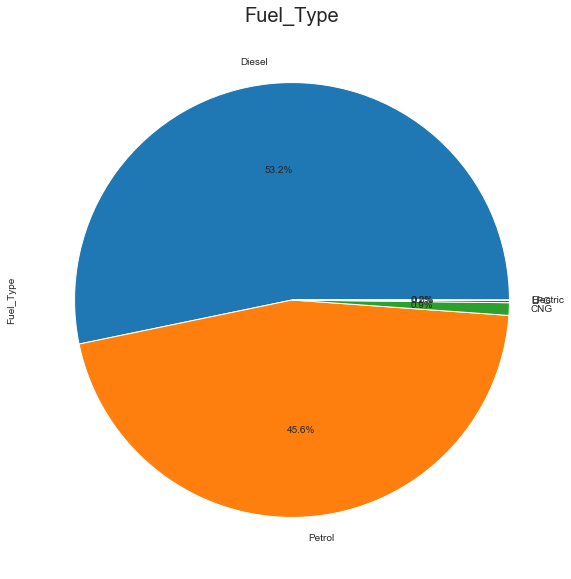

In [19]:
plt.figure(figsize=(20,10))
plt.title('Fuel_Type',fontsize=20)
df_train['Fuel_Type'].value_counts().plot.pie(autopct="%1.1f%%")

# Location v/s Fuel_Type...Nikhita Kalburgikar Code

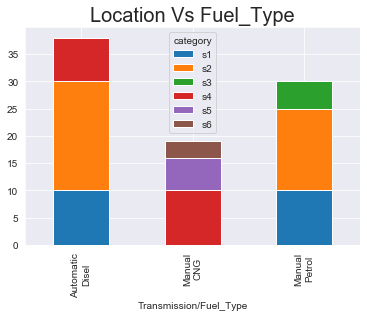

In [20]:
all_data = [('Manual', 'Petrol', ['s1',10],['s2',15],['s3',5]),
            ('Automatic', 'Disel', ['s4',8], ['s2',20],['s1',10]),
            ('Manual', 'CNG', ['s4',10],['s5',6], ['s6',3]) ]

#load data into dataframe
df = pd.DataFrame(all_data, columns = list("ABCDE"))
#combine the two descriptors
df["Transmission/Fuel_Type"] = df["A"] + "\n" + df["B"]
#assign each list to a new row with the appropriate day/time label
df = df.melt(id_vars = ["Transmission/Fuel_Type"], value_vars = ["C", "D", "E"])
#split each list into category and value
df[["category", "val"]] = pd.DataFrame(df.value.values.tolist(), index = df.index)
#create a table with category-value pairs from all lists, missing values are set to NaN
df = df.pivot(index = "Transmission/Fuel_Type", columns = "category", values = "val")
#plot a stacked bar chart
df.plot.bar(stacked=True)
plt.title('Location Vs Fuel_Type',fontsize = 20)
plt.show()

# Fuel_Type v/s Price...Kartik Narang Code

<Figure size 864x864 with 0 Axes>

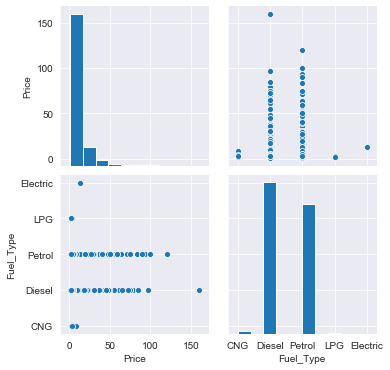

In [21]:
plt.figure(figsize = (12, 12))
sns.pairplot(df_train, vars = ['Price', 'Fuel_Type'])
plt.show()

# Transmission v/s Price...Kartik Narang Code

<Figure size 864x864 with 0 Axes>

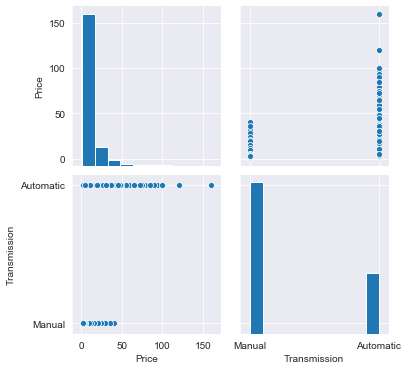

In [22]:
plt.figure(figsize = (12, 12))
sns.pairplot(df_train, vars = ['Price', 'Transmission'])
plt.show()

# Owner_Type v/s Price...Kartik Narang Code

<Figure size 864x864 with 0 Axes>

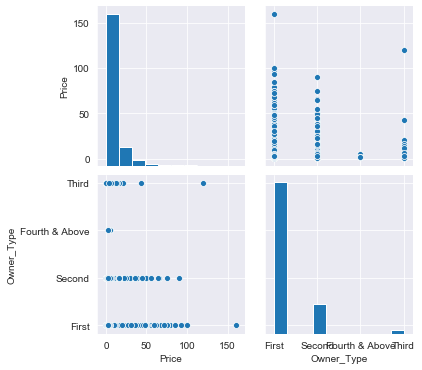

In [23]:
plt.figure(figsize = (12, 12))
sns.pairplot(df_train, vars = ['Price', 'Owner_Type'])
plt.show()

# Brand v/s Price...Rohan Khandekar Code

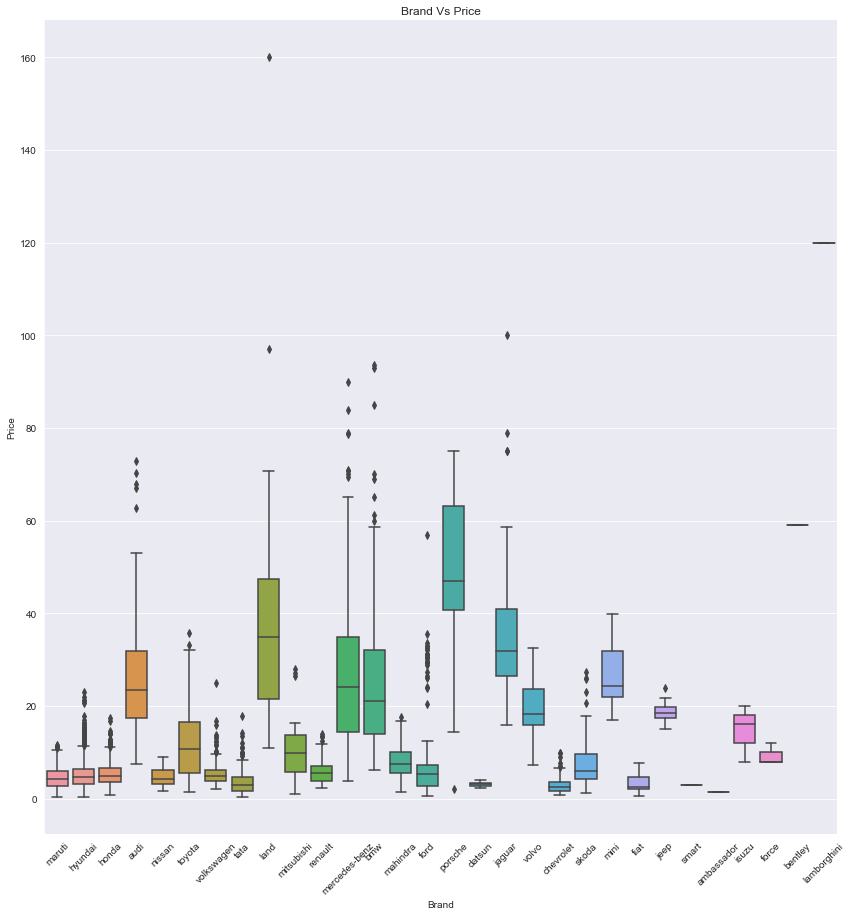

In [24]:
mx = sns.factorplot(y = "Price", x = "Brand", data = df_train, kind = "box", size = 12 ,aspect = 1)
mx.set(ylabel = 'Price')
mx.set(xlabel = 'Brand')
plt.title('Brand Vs Price')
mx.set_xticklabels(rotation = 45)
plt.show()

# Count of Manual transmission cars in each city ...Rohan Khandekar Code

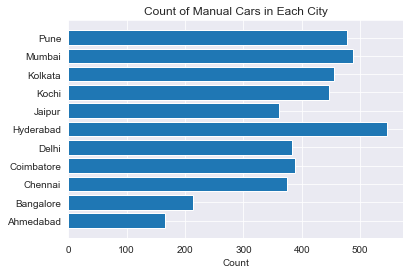

In [25]:
manual = df_train[df_train.Transmission == 'Manual']
manual.groupby(by = 'Location')['Location'].count().index.tolist()
plt.barh(manual.groupby(by = 'Location')['Location'].count().index.tolist(), manual.groupby(by = 'Location')['Location'].count().values.tolist())
plt.title('Count of Manual Cars in Each City')
plt.xlabel('Count')
plt.savefig('Count of manual cars in each city')
plt.show()

# Count of Automatic transmission cars in each city ...Rohan Khandekar Code

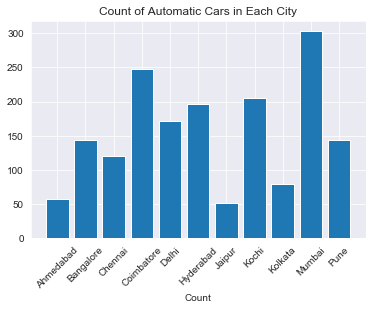

In [26]:
auto = df_train[df_train.Transmission == 'Automatic']
auto.groupby(by = 'Location')['Location'].count().index.tolist()
plt.bar(auto.groupby(by = 'Location')['Location'].count().index.tolist(), auto.groupby(by = 'Location')['Location'].count().values.tolist())
plt.title('Count of Automatic Cars in Each City')
plt.xlabel('Count')
plt.xticks(rotation = 45)
plt.savefig('Count of manual cars in each city')
plt.show()

# Distribution of Power...Siddhisa Banerjee Code

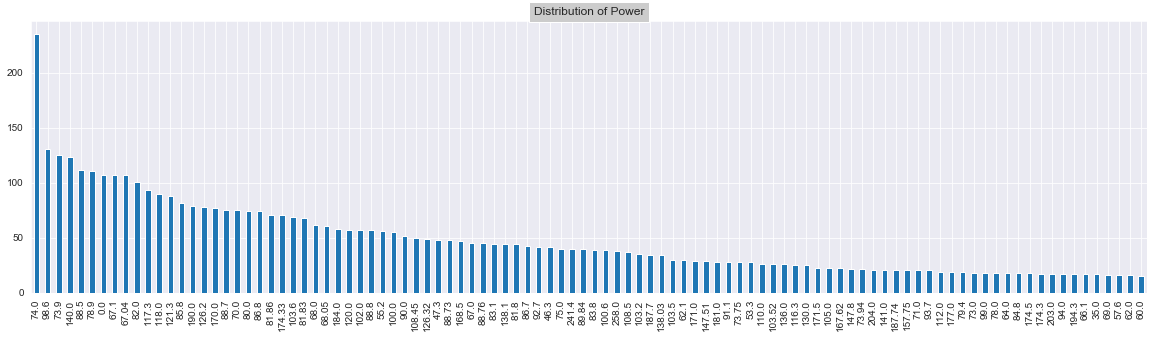

In [27]:
plt.figure(figsize=(20,5))
df_train['Power'].value_counts().head(100).plot.bar()
plt.title('Distribution of Power',bbox={'facecolor':'0.8', 'pad':5})
plt.show()

# Power v/s Price...Rohan Khandekar Code

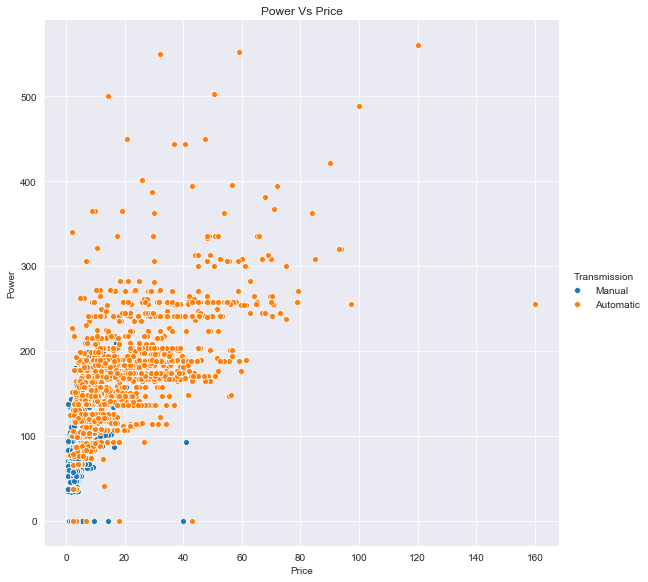

In [28]:
sns.FacetGrid(df_train, hue = 'Transmission', size = 8)\
    .map(sns.scatterplot, "Price", "Power")\
    .add_legend()
_ = plt.title('Power Vs Price')
plt.show()

# Analyzing Mileage...Sampras Code

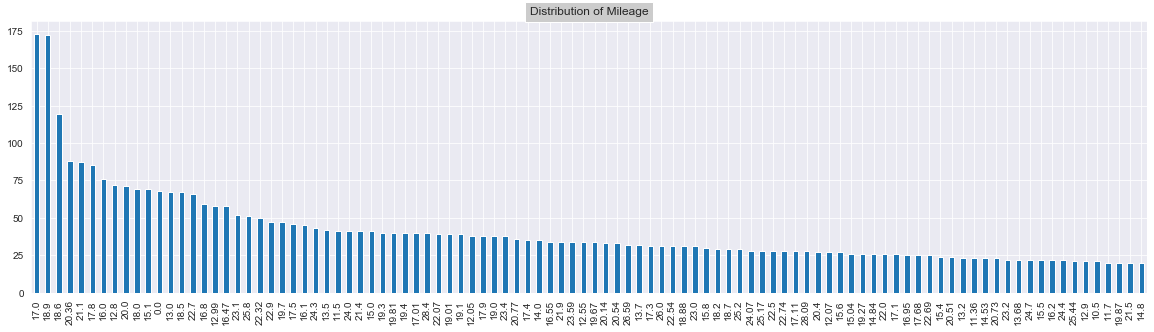

In [29]:
plt.figure(figsize=(20,5))
df_train['Mileage'].value_counts().head(100).plot.bar()
plt.title('Distribution of Mileage',bbox={'facecolor':'0.8', 'pad':5})
plt.show()

# Analyzing Engine....Sampras Code

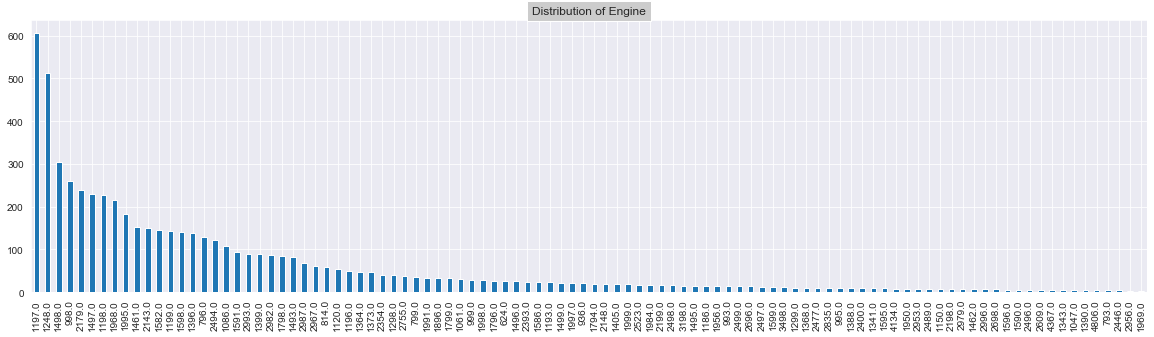

In [30]:
plt.figure(figsize=(20,5))
df_train['Engine'].value_counts().head(100).plot.bar()
plt.title('Distribution of Engine',bbox={'facecolor':'0.8', 'pad':5})
plt.show()

# Analyzing Mileage v/s Price...Sampras Code

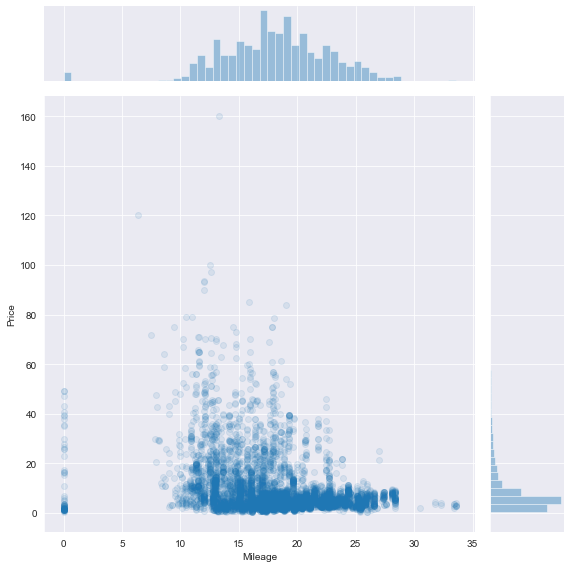

In [31]:
sns.jointplot(x='Mileage', y='Price',data=df_train,alpha=0.1,size=8)
plt.show()

# Analyzing Engine v/s Price...Sampras Code

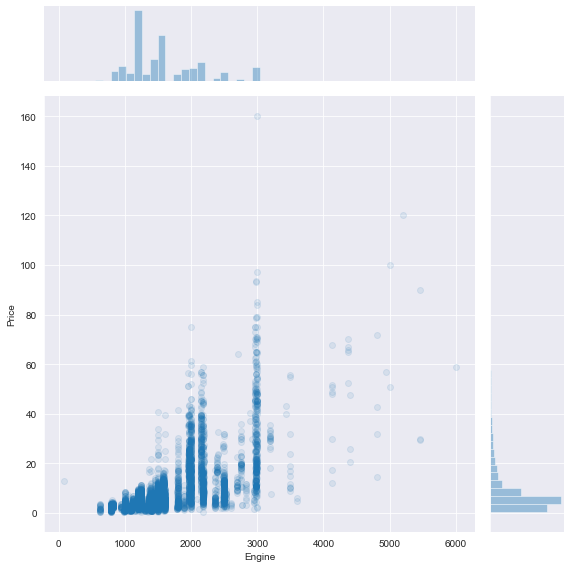

In [32]:
sns.jointplot(x='Engine', y='Price',data=df_train,alpha=0.1,size=8)
plt.show()

#Correlation matrix of Train Data using heatmap...Sampras Code

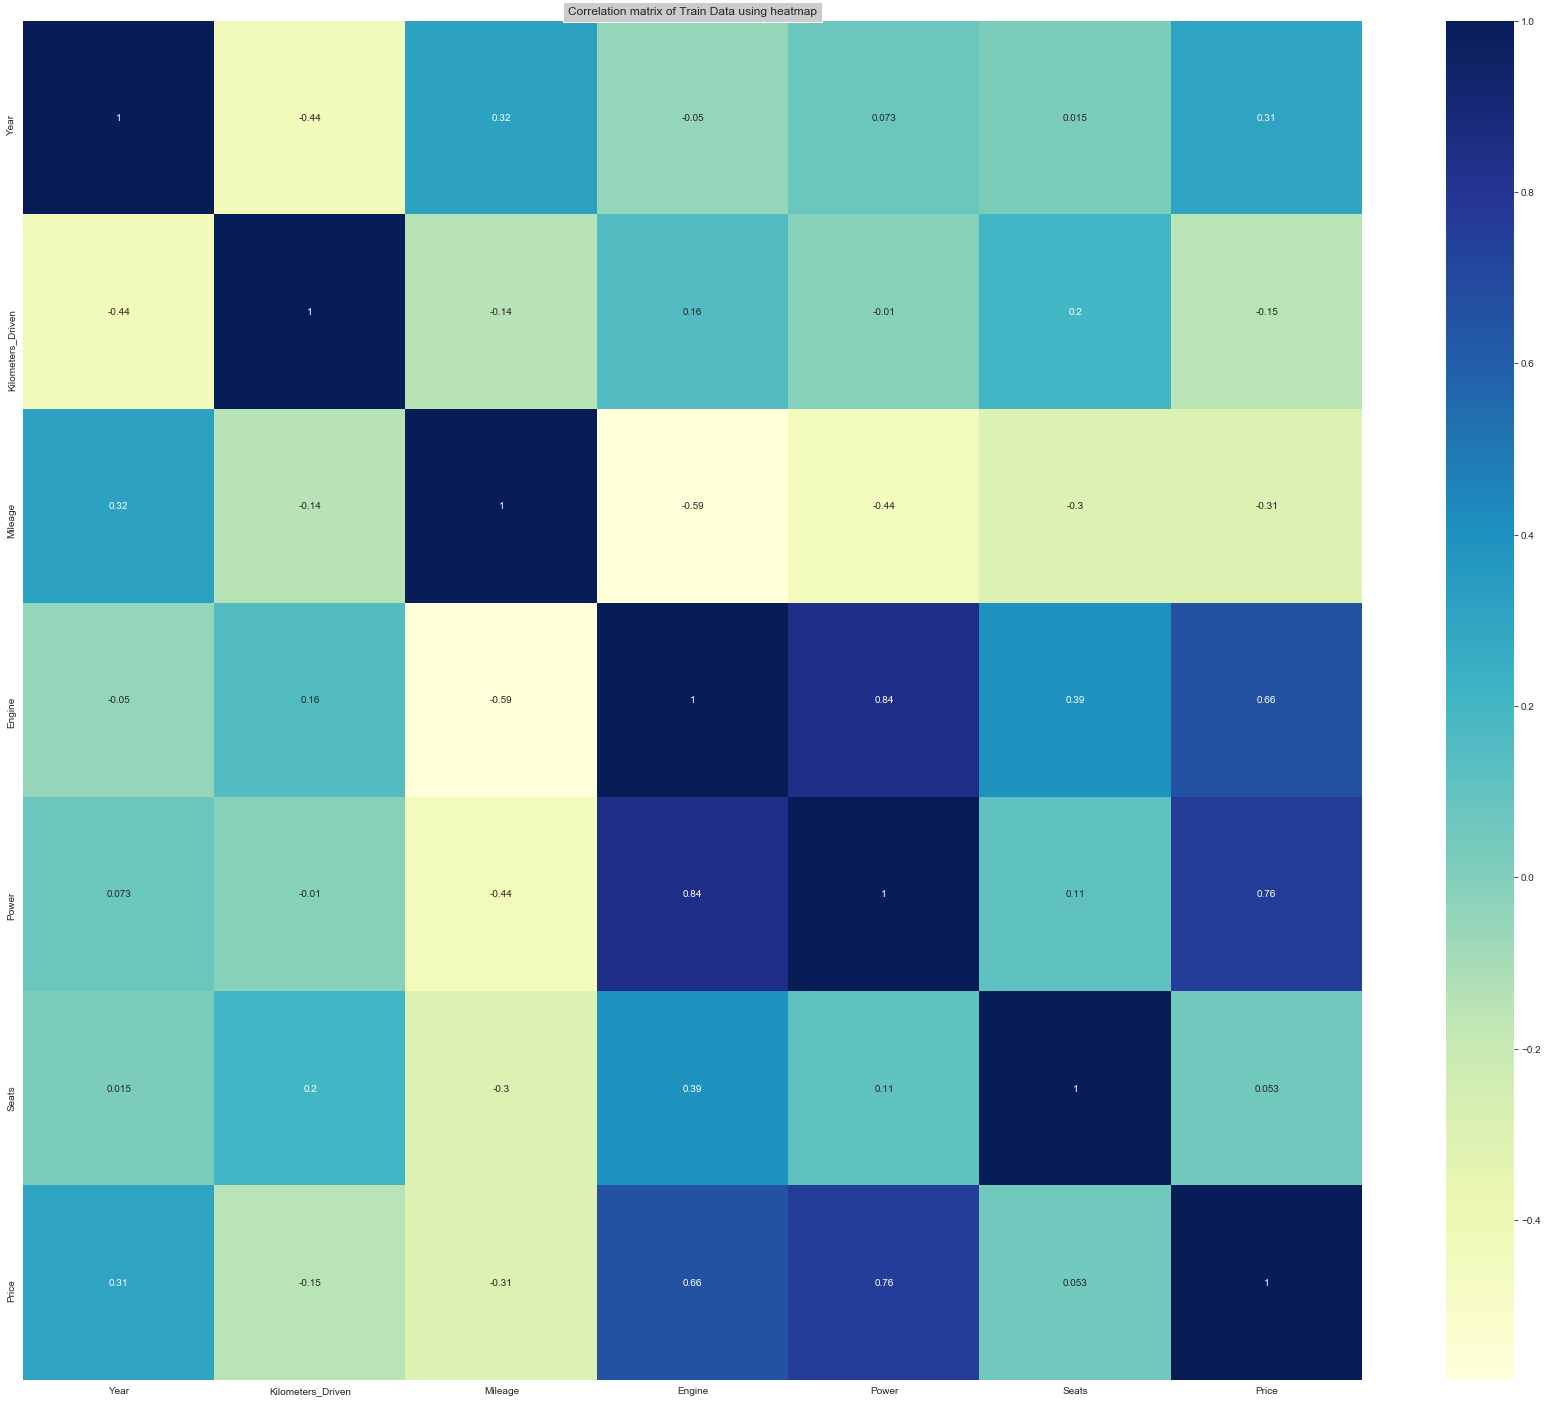

In [33]:
plt.figure(figsize = (30, 25))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.title('Correlation matrix of Train Data using heatmap',bbox={'facecolor':'0.8', 'pad':5})
plt.show()